In [1]:
import pandas as pd

In [2]:
train = pd.read_csv("../input/pg_2505/train.csv")
test = pd.read_csv("../input/pg_2505/test.csv")

In [3]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 750000 entries, 0 to 749999
Data columns (total 9 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   id          750000 non-null  int64  
 1   Sex         750000 non-null  object 
 2   Age         750000 non-null  int64  
 3   Height      750000 non-null  float64
 4   Weight      750000 non-null  float64
 5   Duration    750000 non-null  float64
 6   Heart_Rate  750000 non-null  float64
 7   Body_Temp   750000 non-null  float64
 8   Calories    750000 non-null  float64
dtypes: float64(6), int64(2), object(1)
memory usage: 51.5+ MB


In [4]:
train.head(10)

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
0,0,male,36,189.0,82.0,26.0,101.0,41.0,150.0
1,1,female,64,163.0,60.0,8.0,85.0,39.7,34.0
2,2,female,51,161.0,64.0,7.0,84.0,39.8,29.0
3,3,male,20,192.0,90.0,25.0,105.0,40.7,140.0
4,4,female,38,166.0,61.0,25.0,102.0,40.6,146.0
5,5,female,26,156.0,56.0,19.0,100.0,40.5,103.0
6,6,female,21,172.0,73.0,3.0,81.0,38.3,9.0
7,7,male,46,188.0,94.0,23.0,100.0,40.8,145.0
8,8,female,33,166.0,63.0,25.0,107.0,40.5,161.0
9,9,male,65,185.0,88.0,23.0,104.0,41.0,185.0


In [5]:
# 型変換（以前の指示に従って）
train['Height'] = train['Height'].astype('int32')
train['Weight'] = train['Weight'].astype('int32')
train['Age'] = train['Age'].astype('int32')
train['Heart_Rate'] = train['Heart_Rate'].astype('int32')
train['Body_Temp'] = train['Body_Temp'].astype('float32')
train['Duration'] = train['Duration'].astype('float32')
train['Calories'] = train['Calories'].astype('float32')
train['Sex'] = train['Sex'].astype('category')

test['Height'] = test['Height'].astype('int32')
test['Weight'] = test['Weight'].astype('int32')
test['Age'] = test['Age'].astype('int32')
test['Heart_Rate'] = test['Heart_Rate'].astype('int32')
test['Body_Temp'] = test['Body_Temp'].astype('float32')
test['Duration'] = test['Duration'].astype('float32')
test['Sex'] = test['Sex'].astype('category')


In [6]:
train.describe()

,id,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
count,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000,750000.000000
mean,374999.500000,41.420404,174.697685,75.145668,15.421015,95.483993,40.036243,88.282791
std,216506.495284,15.175049,12.824496,13.982704,8.354095,9.449843,0.779875,62.395351
min,0.000000,20.000000,126.000000,36.000000,1.000000,67.000000,37.099998,1.000000
25%,187499.750000,28.000000,164.000000,63.000000,8.000000,88.000000,39.599998,34.000000
50%,374999.500000,40.000000,174.000000,74.000000,15.000000,95.000000,40.299999,77.000000
75%,562499.250000,52.000000,185.000000,87.000000,23.000000,103.000000,40.700001,136.000000
max,749999.000000,79.000000,222.000000,132.000000,30.000000,128.000000,41.500000,314.000000


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype   
---  ------      --------------   -----   
 0   id          250000 non-null  int64   
 1   Sex         250000 non-null  category
 2   Age         250000 non-null  int32   
 3   Height      250000 non-null  int32   
 4   Weight      250000 non-null  int32   
 5   Duration    250000 non-null  float32 
 6   Heart_Rate  250000 non-null  int32   
 7   Body_Temp   250000 non-null  float32 
dtypes: category(1), float32(2), int32(4), int64(1)
memory usage: 7.9 MB


In [8]:
# シンプルに年齢性別ごとにplotしてみる
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib

# 'Sex' カラムは数値型ではないので、除外
df_numeric = train.select_dtypes(include=['float32', 'int32'])

# 相関行列の計算
corr_matrix = df_numeric.corr()
corr_matrix 

,Age,Height,Weight,Duration,Heart_Rate,Body_Temp,Calories
Age,1.000000,0.011975,0.073690,0.015656,0.017038,0.030275,0.145683
Height,0.011975,1.000000,0.957967,-0.029936,-0.013234,-0.034641,-0.004026
Weight,0.073690,0.957967,1.000000,-0.020845,-0.002384,-0.023717,0.015863
Duration,0.015656,-0.029936,-0.020845,1.000000,0.875327,0.903066,0.959908
Heart_Rate,0.017038,-0.013234,-0.002384,0.875327,1.000000,0.795972,0.908748
Body_Temp,0.030275,-0.034641,-0.023717,0.903066,0.795972,1.000000,0.828671
Calories,0.145683,-0.004026,0.015863,0.959908,0.908748,0.828671,1.000000


<Axes: >

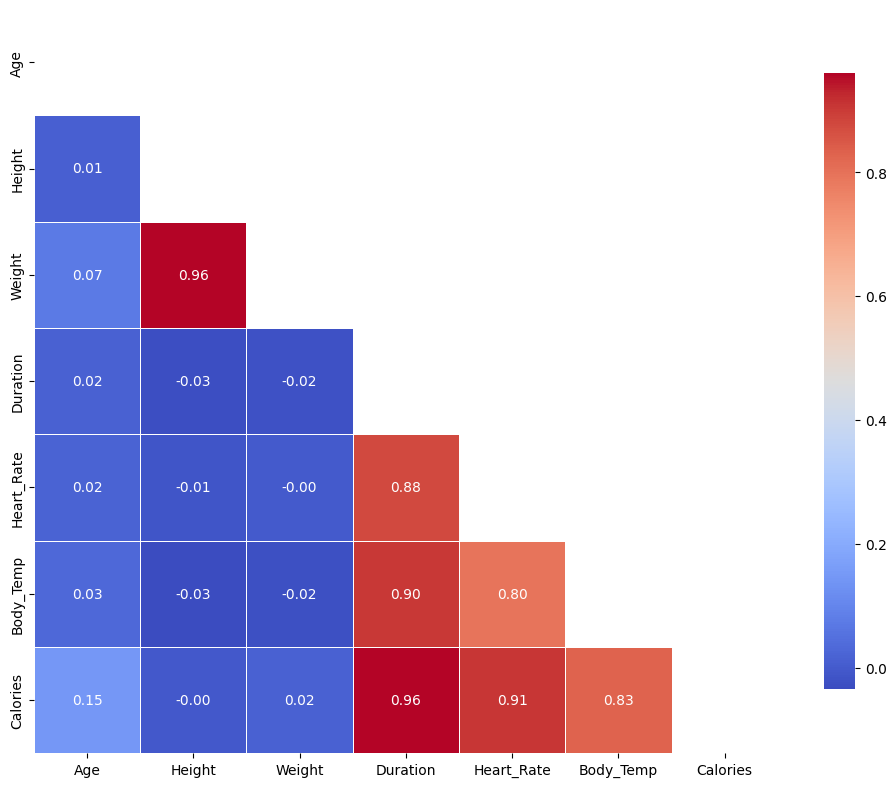

In [9]:
# 上三角行列をマスク
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# ヒートマップの設定
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix,
            annot=True,                # 値を表示
            fmt='.2f',                 # 小数点以下2桁
            cmap='coolwarm',           # 色のカスタマイズ
            square=True,               # 正方形に調整
            mask=mask,                 # 上三角行列をマスク
            linewidths=0.5,            # 枠線の幅
            cbar_kws={'shrink': 0.8},  # カラーバーの縮小
            cbar=True,                 # カラーバーを表示
            linecolor='white')         # 行列の枠線の色



In [10]:
# random forestで予測してベースライン求める
from sklearn.ensemble import RandomForestClassifier

# train 
y_train = train['Calories']
X_train = train.drop(['Calories', "id"], axis=1)
X_train = pd.get_dummies(X_train)
X_train

# test
X_test = test.drop(["id"], axis=1)
X_test = pd.get_dummies(X_test)


# 
#del train
#del test

# fit, predict
rf = RandomForestClassifier(n_estimators=10, random_state=42, max_samples=0.01)
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)
y_pred

array([ 29., 105.,  76., ...,  66., 141.,  71.], dtype=float32)

In [11]:
import psutil

def memory_usage():
    process = psutil.Process()
    return process.memory_info().rss / (1024 * 1024)  # MB単位でメモリ使用量を表示

print(f"Current memory usage: {memory_usage()} MB")


Current memory usage: 605.33203125 MB


In [12]:
y_pred

array([ 29., 105.,  76., ...,  66., 141.,  71.], dtype=float32)

In [13]:
test

,id,Sex,Age,Height,Weight,Duration,Heart_Rate,Body_Temp
0,750000,male,45,177,81,7.0,87,39.799999
1,750001,male,26,200,97,20.0,101,40.500000
2,750002,female,29,188,85,16.0,102,40.400002
3,750003,female,39,172,73,20.0,107,40.599998
4,750004,female,30,173,67,16.0,94,40.500000
...,...,...,...,...,...,...,...,...
249995,999995,female,56,159,62,6.0,85,39.400002
249996,999996,male,32,202,101,3.0,84,38.400002
249997,999997,female,31,164,64,14.0,98,40.099998
249998,999998,female,62,158,61,25.0,106,40.700001


In [14]:
test['Calories'] = y_pred
output = test[['id', 'Calories']]
output.to_csv('../output/pg_submission_v1.csv', index=False)